In [5]:
import numpy as np
import h5py 
import cv2
import matplotlib.pyplot as plt

with h5py.File('../../CodePass2/runs/finale.hdf5', 'r') as f:
    # read the data
    x = f['x'][:]
    properties = f['properties'][:][0]
    p = f['p'][:]

In [12]:
gb_left = np.logical_and(properties == 1, x[0,:,1] < 0)

(-76.01607761383056, 58.47767505645752, -25.64211187362671, 25.65928373336792)

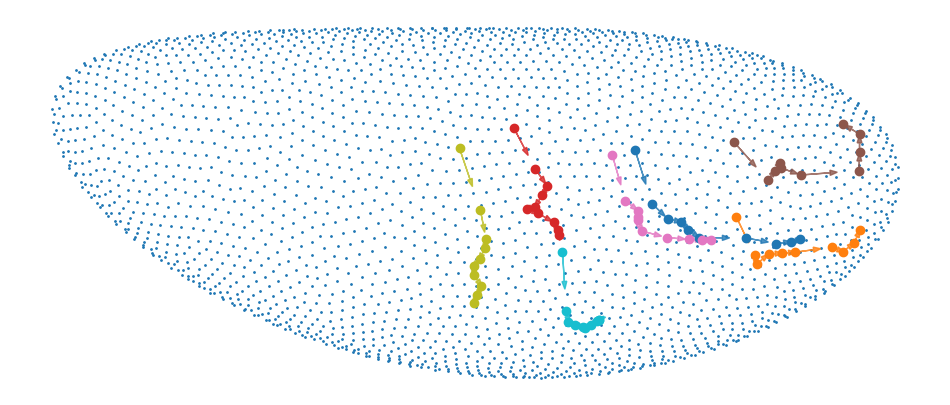

In [168]:
# make 10 time steps
ts = np.linspace(1,x.shape[0]-1, 10,).astype(int)

# get 5 random particles in gb
gb_particles = np.where(gb_left)[0]
gb_particles = np.random.choice(gb_particles, 5)
best_gb = [3367, 4537, 498, 1994, 1735, 2856, 567]

y = x[0,:,1]

plt.figure(figsize=(12,5))
plt.scatter(x[0,:,0][y < 0], x[0,:,2][y < 0], s = 1)

# plt.show()
# make 7 distinct colors

from matplotlib import cm
cols = cm.tab10(np.linspace(0,1,7))

# for t in ts:
    # plt.figure(figsize=(10,5))
    # plt.scatter(x[t,:,0][y < 0], x[t,:,2][y < 0])
for i in range(len(best_gb)):
    p, c = best_gb[i], cols[i]
    plt.plot(x[ts,p,0], x[ts,p,2], 'o', c =c , alpha =1)
    # make an arrowfrom each point to halfway between the next point
    for j in range(len(ts)-1):
        halfway = (x[ts[j],p] + x[ts[j+1],p])/2
        plt.arrow(x[ts[j],p,0], x[ts[j],p,2], halfway[0] - x[ts[j],p,0], halfway[2] - x[ts[j],p,2], color = c, alpha = 0.8, head_width = 0.7)
    # plt.show()
# remove the axes
plt.axis('off')

In [215]:


fig, axs = plt.subplots(2, 2, figsize=(12,5*3), constrained_layout=True, sharex=True, sharey=True)

axs = axs.flatten()
axind = 0
for t in ts[::2][1:]:
    if t == 0:
        continue
    movements_since_last = x[t] - x[t-70]

    # for each particle, draw an arrow showing the movement since last
    for cell in range(x.shape[1]):
        if y[cell] > -100:
            axs[axind].arrow(x[t-20,cell,0], x[t-20,cell,2], movements_since_last[cell,0], movements_since_last[cell,2], color = 'black', alpha = np.minimum(np.abs(y[cell]+23.4)/(23.4*2) + 0.0, 1), head_width = 0.7)
    

    # remove the axes
    axs[axind].axis('off')
    axind += 1

plt.show()

: 

In [201]:
# littman

n_runs = 100_000

bobs, alices = np.zeros(n_runs), np.zeros(n_runs)
for run in range(n_runs):
    # 100 coin flips
    n = 100
    # 0 is heads, 1 is tails
    flips = np.random.randint(0,2,n)
    
    # check Alice
    for i in range(1,n):
        if flips[i] and flips[i-1]:
            alices[run] = i
            break
    # check Bob
    for i in range(1,int(n/2)):
        # check if last two flips were tails
        if flips[i*2] and flips[i*2-2]:
            bobs[run] = i
            break




array([3., 2., 1., ..., 1., 3., 3.])

In [200]:
print(sum(alices > bobs))
print(sum(alices < bobs))
print(sum(alices == bobs))


45226
34000
20774


In [193]:
winners.mean()

0.54967